In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X=np.linspace(0,np.pi*6,100)

In [59]:
y=np.sin(X)

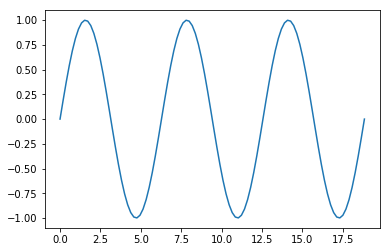

In [60]:
plt.plot(X,y)
plt.show()

In [97]:
def make_poly(X,d):
    n=len(X)
    data=[np.ones(n)]
    for i in range(0,d):
        data.append(X**i+1+1)
    return np.vstack(data).T

In [98]:
X_new=make_poly(X,6)

In [99]:
def fit(X,y):
    return np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))

In [109]:
def fit_display(X,y,sample,degree):
    N=len(X)
    tr_i=np.random.choice(N,sample)
    X_train=X[tr_i]
    y_train=y[tr_i]
    X_poly=make_poly(X_train,degree)
    B=fit(X_poly,y_train)
    y_pred=X_poly.dot(B)
    print(get_mse(y_train,y_pred))
    plt.plot(X,y)
    plt.plot(X_train,y_pred)
    plt.scatter(X_train,y_train)
    plt.title('Degree {0}'.format(degree))
    plt.show()

0.3732246273372837


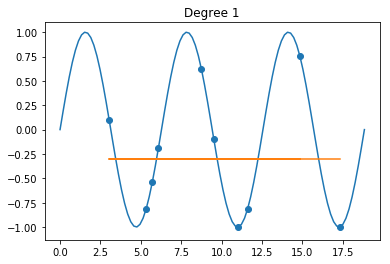

0.33772900629309094


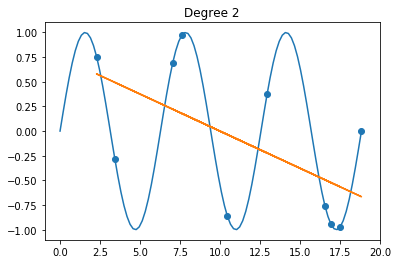

0.34281395552361543


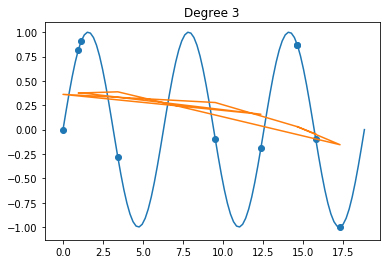

0.3425842729737693


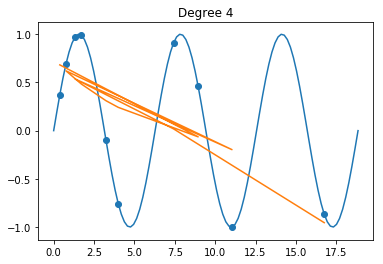

0.10932110452313819


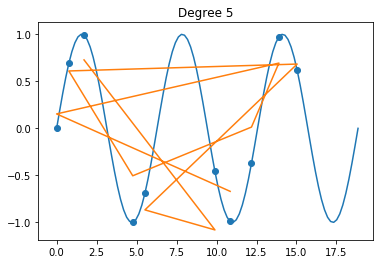

0.0014562106469618759


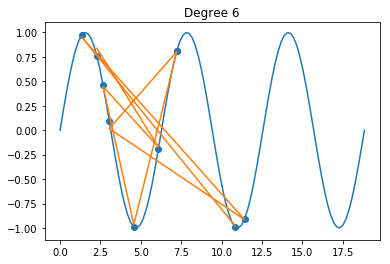

0.077298127191651


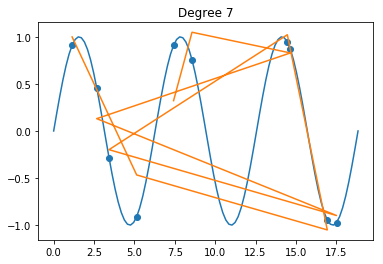

0.0121630583303738


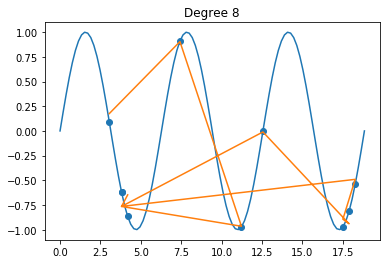

0.05535010860276936


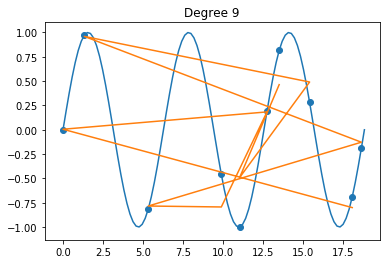

In [110]:
for d in range(1,10):
    fit_display(X,y,10,d)

In [106]:
def get_mse(y,y_pred):
    return ((y-y_pred)**2).sum()/len(y)

In [115]:
def train_vs_test_error_comparison(X,y,sample,degree):
    N=len(X)
    tr_i=np.random.choice(N,sample)
    X_train=X[tr_i]
    y_train=y[tr_i]
    t_i=[i for i in range(N) if i not in tr_i]
    X_test=X[t_i]
    y_test=y[t_i]
    mse_test=[]
    mse_train=[]
    for i in range(degree+1):
        X_train_p=make_poly(X_train,i)
        X_test_p=make_poly(X_test,i)
        B=fit(X_train_p,y_train)
        y_pred=X_train_p.dot(B)
        mse_train.append(get_mse(y_train,y_pred))
        y_pred=X_test_p.dot(B)
        mse_test.append(get_mse(y_test,y_pred))
    plt.plot(range(degree+1),mse_train)
    plt.plot(range(degree+1),mse_test)
    plt.show()
    

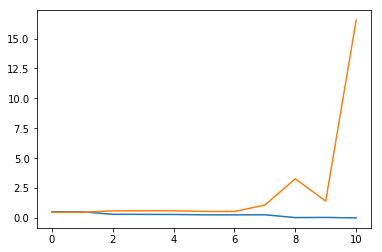

In [118]:
train_vs_test_error_comparison(X,y,20,10)